In [1]:
import numpy as np 
import pandas as pd 
import random
from collections import Counter
from typing import Tuple
from typing import List
import sys
from matplotlib import pyplot as plt

In [2]:
class colors():
    
    __slots__ = '__possibilities'
    
    def __init__(self):
        self.__possibilities = ['♠', '♦', '♥', '♣'] #['S','H','D','C'] #no need to ensure type
    
    def getPossibilities(self):
        return self.__possibilities

In [3]:
class numbers():
    
    __slots__ = '__possibilities'
    
    def __init__(self):
        self.__possibilities = ['2','3','4','5','6','7','8','9','10','J','Q','K','A'] #no need to ensure type
    
    def getPossibilities(self):
        return self.__possibilities

In [4]:
class card():
    __slots__ = '__color', '__number'
    
    def __init__(self,aColor, aNumber):
        if aColor not in colors().getPossibilities() or aNumber not in numbers().getPossibilities():
            raise Exception("wrong color or number")
        self.__color = aColor
        self.__number = aNumber
        
    def getColor(self):
        return self.__color
    
    def getNumber(self):
        return self.__number
    
    def visualize(self):
        print(self.__color+self.__number)

In [5]:
class hand():
    __slots__ = '__cards', '__size', '__numbersOnly', '__colorsOnly'
    
    def __init__(self):
        self.__size = 0
        self.__cards = []
        self.__numbersOnly = []
        self.__colorsOnly = []
        
    def addCard(self, aCard:card):
        self.__cards.append(aCard)
        self.__numbersOnly.append(aCard.getNumber())
        self.__colorsOnly.append(aCard.getColor())
        self.__size = self.__size + 1
        
    def getCards(self):
        return self.__cards
    
    def getNumbers(self):
        return self.__numbersOnly
    
    def getColors(self):
        return self.__colorsOnly
    
    def visualizeHand(self):
        myVisu = []
        for card in self.__cards:
            myVisu.append(card.getNumber() + card.getColor())
        print(myVisu)
            

        

In [6]:
class deck():
    __slots__ = '__cards'
        
    def __init__(self):
        self.__cards = []
        for color in colors().getPossibilities():
            for number in numbers().getPossibilities():
                self.__cards.append(card(color, number))
        random.shuffle(self.__cards)
    
    def drawCard(self,card_=None):
        if card_:
            #card_.visualize()
            # self.__cards.remove(card_) // class object type : it won't be recognized as in the list
            found = False
            for idx,card in enumerate(self.__cards):
                if card.getColor() == card_.getColor() and card.getNumber() == card_.getNumber():
                    self.__cards.pop(idx)
                    found = True
                    break
            if not found:
                raise Exception("same card chosen")
                    
            myCardToReturn = card_
        else:
            myCardToReturn = self.__cards.pop(0)
        return myCardToReturn
    
    def getDeck(self):
        return self.__cards

In [7]:
class river():
    __slots__ = '__cards', '__size', '__numbersOnly', '__colorsOnly'
    
    def __init__(self):
        self.__size = 0
        self.__cards = []
        self.__numbersOnly = []
        self.__colorsOnly = []
        
    def addCard(self, aCard:card):
        self.__cards.append(aCard)
        self.__numbersOnly.append(aCard.getNumber())
        self.__colorsOnly.append(aCard.getColor())
        self.__size = self.__size + 1
        
    def getCards(self):
        return self.__cards
    
    def getNumbers(self):
        return self.__numbersOnly
    
    def getColors(self):
        return self.__colorsOnly
    
    def visualizeHand(self):
        myVisu = []
        for card in self.__cards:
            myVisu.append(card.getNumber() + card.getColor())
        print(myVisu)
            


In [8]:
def isFlush(aHand:hand) -> bool:
    return max(Counter(aHand.getColors()).values()) >= 5

def isStraight(aHand:hand) -> Tuple[bool, int]:
    first = True
    countConseq = 0
    maxConSeq = 0
    lastCardSeq = 0
    myIndexedSortedHand = sorted([numbers().getPossibilities().index(x) for x in aHand.getNumbers()])
    for idx in myIndexedSortedHand:
        if not first:
            if idx == myLastIdx+1:
                countConseq = countConseq+1
                lastCardSeq = myLastIdx #to compare between straights
            else:
                countConseq = 0
            if countConseq > maxConSeq :
                maxConSeq = countConseq
        first = False
        myLastIdx = idx
    
    return maxConSeq>=5,int(lastCardSeq)
    
    
def howManySameNumber(aHand:hand)-> Tuple[List,List,List]:
    myCount = Counter(aHand.getNumbers())
    
#     nbFourOfAKind = Counter(myCount.values())[4] #how many four of a kind ..
    cards4 = [numbers().getPossibilities().index(x) for x in [k for (k, v) in myCount.items() if v == 4]]
#     nbThreeOfAKind = Counter(myCount.values())[3]
    cards3 = [numbers().getPossibilities().index(x) for x in [k for (k, v) in myCount.items() if v == 3]]
#     nbPair = Counter(myCount.values())[2]
    cards2 = [numbers().getPossibilities().index(x) for x in [k for (k, v) in myCount.items() if v == 2]]
    
    return cards2,cards3,cards4
    
def singleCard(aHand:hand, idxBest=1): #idxBest starts at 1 for best, 2 for snd Best
    
    return sorted([numbers().getPossibilities().index(x) for x in aHand.getNumbers()])[-idxBest] #get number with highest

In [9]:
def getValue(aHand:hand) -> float:
    myValue = 0
    myStraight, myidx = isStraight(aHand)
    myFlush = isFlush(aHand)
    myRoyal = myidx is len(numbers().getPossibilities())-1
    
    myPairs, myThrees, myFour = howManySameNumber(aHand) 
    
    myValue = myValue + myStraight*myFlush*myRoyal*40400000000000 + myStraight*myFlush*2040000000000*myidx
   
    if len(myFour):
        myFourValue = 102000000000*myFour[0]
    else:
        myFourValue = 0
    
    if len(myThrees)==2 or (len(myThrees)==1 and len(myPairs)):
        myFullHouse= 5600000000 * max(myThrees)
    else:
        myFullHouse = 0
    
    
    if len(myPairs)==2:
        myTwoPairs = 70000 * sorted(myPairs)[1]+4000 * sorted(myPairs)[0]
    else:
        myTwoPairs = 0
    
    if len(myThrees)==1:
        myThreeCard = 1400000 * max(myThrees)
    else:
        myThreeCard = 0
        
    if len(myPairs)==1:
        myOnePair = 200 * max(myPairs)
    else:
        myOnePair = 0
    
    myValue = myValue + myFourValue + myFullHouse + 280000000*myFlush + 28000000*myStraight*myidx
    myValue = myValue + myThreeCard + myTwoPairs + myOnePair 
    
    initCoef = 10
    for i in range(0,7):
        myValue = myValue + singleCard(aHand,i+1)*initCoef
        initCoef = initCoef/20
    
    return myValue
    

In [10]:
# a = ['K', 'J', 'A','A'] 
# possibilities = ['2','3','4','5','6','7','8','9','J','Q','K','A']

# sorted(np.unique(a), key=lambda x: possibilities.index(x))

In [11]:
# nbPlayers = 20
# myDeck = deck()
# mySmallHands = [] #individualHand
# myBigHands = [] #Hand with River
# for i in range(0,nbPlayers):
#     mySmallHands.append(hand())
#     myBigHands.append(hand())
# myRiver = river()

In [12]:

# #draw cards
# for drawnCard in range(0,2):
#     for player in range(0,nbPlayers):
#         myCard = myDeck.drawCard()
#         mySmallHands[player].addCard(myCard)
#         myBigHands[player].addCard(myCard)
        
# #draw cards in the river
# for drawnCard in range(0,5):
#     myCard = myDeck.drawCard()
    
#     myRiver.addCard(myCard)
#     for player in range(0,nbPlayers):
#         myBigHands[player].addCard(myCard)

In [13]:
# for i in range(0,nbPlayers):
#     print(getValue(myBigHands[i]))

In [14]:
# for i in range(0,nbPlayers):
#     print(myBigHands[i].visualizeHand())

In [24]:
#@deprecated
class game_simple():
    
    __slots__ = "nbPlayers", "deck", "smallHands", "bigHands", "river", "judgerEnabler", 'winner', 'forcedCards'
    
    def __init__(self, nbOfPlayer_ : int, forcedCards_:bool = False):
        print('This function is deprecated, only used to calculate simple probabilities of best hand, use game class for real game')
        self.judgerEnabler = 0
        self.nbPlayers = nbOfPlayer_
        self.deck = deck()
        self.smallHands = [] #individualHand
        self.bigHands = [] #Hand with River
        self.forcedCards = forcedCards_
        
        for i in range(0,self.nbPlayers):
            self.smallHands.append(hand())
            self.bigHands.append(hand())
            
        self.river = river()
        self.winner = None
        
        
    def dealCards(self,*kwargs) -> "Nothing":
        if self.forcedCards and len(kwargs)!=2:
            raise Exception("You need to add 2 cards as argument")
        else:
        #draw cards
            if self.judgerEnabler == 0:
                for player in range(0,self.nbPlayers):
                    for drawnCard in range(0,2):
                        if self.forcedCards and player==0:
                            #print(kwargs[drawnCard])
                            myCard = self.deck.drawCard(kwargs[drawnCard])
                        else:
                            myCard = self.deck.drawCard()
                            
                        self.smallHands[player].addCard(myCard)
                        self.bigHands[player].addCard(myCard)
            else:
                raise Exception("Already dealt cards to players")
            self.judgerEnabler = 1
                
    def dealFlop(self) -> "Nothing":
        if self.judgerEnabler == 1:
            for drawnCard in range(0,3):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler > 1:
            raise Exception("Already did the flop")
        self.judgerEnabler = 2
            
    def dealTurn(self) -> "Nothing":
        if self.judgerEnabler == 2:
            for drawnCard in range(0,1):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler == 1:
            raise Exception("Flop has not been done, please do things in order")
        elif self.judgerEnabler > 2:
            raise Exception("Already did the Turn, it is now time for the River")
        self.judgerEnabler = 3
        
    def dealRiver(self) -> "Nothing":
        if self.judgerEnabler == 3:
            for drawnCard in range(0,1):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
            self._judgeTheGame()
            
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler == 1:
            raise Exception("Flop has not been done, please do things in order")
        elif self.judgerEnabler == 2:
            raise Exception("Turn has not been done, please do things in order")
        elif self.judgerEnabler > 3:
            raise Exception("the Game is Over")
        self.judgerEnabler = 4
        
    def _judgeTheGame(self):
        myValues = []
        for i in range(0,self.nbPlayers):
            myValues.append(getValue(self.bigHands[i]))
        self.winner = myValues.index(max(myValues))
        
    def getWinner(self):
        return self.winner

In [28]:
from enum import Enum
class actions(Enum):
    FOLD = 1
    CHECK = 2
    BET = 3

In [109]:
class manualPlayer():
    
    def takeDecision(self,aGame, aCurrentBet, aPlayerInt):
        
        print('You are player '+str(aPlayerInt))
        print('\n You have ' + str(aGame.cash[aPlayerInt]) +' dollars')
        print('\n There is '+str(aGame.pot) +' dollars in the pot')
        print('Current bet is ' + str(aCurrentBet) + ', you need to add ' + str(min(aCurrentBet - aGame.bets[aPlayerInt], aGame.cash[aGame.playingGuy])))
        print('\n Your cards are :')
        aGame.smallHands[aPlayerInt].visualizeHand()
        print('\n The River is :')
        aGame.river.visualizeHand()
        myAction = input("\n F:Fold \n B+X:Bet X dollars \n C:Check \n \n")
                         
        if myAction=='F':
            return actions.FOLD,0
        elif myAction == 'C':
            return actions.CHECK,aCurrentBet
        else:
            if(int(myAction.split('+')[1])<aCurrentBet):
                print('Cheater, Burn in hell, I\'ll fix this')
            return actions.BET,int(myAction.split('+')[1])
        
        print("error, shouldn't arrive here, check manual player")

In [113]:
class game():
    
    __slots__ = "nbPlayers", "deck", "smallHands", "bigHands", "river", "judgerEnabler", 'winner', 'forcedCards', 'cash', \
    'startingGuy', 'startingBet', 'pot', 'inGamePlayer', 'playerAlgo', 'bets', 'playingGuy'
    
    def __init__(self, nbOfPlayer_ : int, forcedCards_:bool = False, cashPile_:int = 1000, startingBet_:int = 5):
        self.judgerEnabler = 0 #counter of game stage
        self.nbPlayers = nbOfPlayer_
        self.deck = deck()
        self.smallHands = [] #individualHand
        self.bigHands = [] #Hand with River
        self.forcedCards = forcedCards_
        self.cash = []
        self.inGamePlayer = []
        self.bets = []
        self.playerAlgo = []
        for i in range(0,self.nbPlayers):
            self.smallHands.append(hand())
            self.bigHands.append(hand())
            self.cash.append(cashPile_)
            self.inGamePlayer.append(1)
            self.bets.append(0)
            self.playerAlgo.append(manualPlayer())
            
        self.river = river()
        self.winner = None
        self.playingGuy = np.random.randint(0,nbOfPlayer_) #nbOfplayer excluded, position of person who starts forced bet
        self.startingBet = startingBet_ #small forced bet
        self.pot = 0 
        
        
        
        
    def dealCards(self,*kwargs) -> "Nothing":
        if self.forcedCards and len(kwargs)!=2:
            raise Exception("You need to add 2 cards as argument")
        else:
        #draw cards
            if self.judgerEnabler == 0:
                for player in range(0,self.nbPlayers):
                    for drawnCard in range(0,2):
                        if self.forcedCards and player==0:
                            #print(kwargs[drawnCard])
                            myCard = self.deck.drawCard(kwargs[drawnCard])
                        else:
                            myCard = self.deck.drawCard()
                            
                        self.smallHands[player].addCard(myCard)
                        self.bigHands[player].addCard(myCard)
            else:
                raise Exception("Already dealt cards to players")
            self.judgerEnabler = 1
    
    def nextPlayer(self) -> "Nothing":
        #set Next Player
        if self.playingGuy == self.nbPlayers-1:
            self.playingGuy=0
        else:
            self.playingGuy = self.playingGuy+1
    
    def _checkIfHomogeneousBet(self) -> bool:
        homogeneous = True
        
        bet0 = ""
        cash0 = ""
        
        allins = False
        for i in range(0,self.nbPlayers):
            if self.inGamePlayer[i]==1: #if player is playing
                if self.cash[i] != 0:
                    bet0 = self.bets[i]
                    cash0 = self.cash[i]
                if (i==self.nbPlayers-1) and (bet0 == ""): #players were all-in
                    print("All left players are all-in, what a game!")
                    return homogeneous
            
        for i in range(0,self.nbPlayers):
            if self.inGamePlayer[i]==1: #if player is playing
                if self.cash[i] != 0: #if player is not all in
                    if self.bets[i] != bet0: # if player's bet is different from any other non all-in player
                        print("bet is "  +str(self.bets[i]), cash0, bet0)
                        homogeneous = False
                        return homogeneous
                    
        return homogeneous
    
    
    
    def doRound(self) -> "Nothing":
        
        currentBet = 0
        self.bets = [0 for i in range(0,self.nbPlayers)]
        
        if(self.judgerEnabler == 1):
            currentBet = self.startingBet
            #forced Bet for first 2
            self.cash[self.playingGuy] = self.cash[self.playingGuy]-min(self.startingBet,self.cash[self.playingGuy])
            self.pot = self.pot + currentBet
            self.bets[self.playingGuy] = currentBet
            
            self.nextPlayer() # get next player

            currentBet = self.startingBet*2
            self.cash[self.playingGuy] = self.cash[self.playingGuy]-min(currentBet,self.cash[self.playingGuy])
            self.pot = self.pot + currentBet
            self.bets[self.playingGuy] = currentBet
            
            self.nextPlayer() # get next player
        
        
        while True:
            
            for i in range(0+self.playingGuy,self.nbPlayers+self.playingGuy):
#                 print(i)
                i=i%self.nbPlayers #doesn't modify the i over the loop, only inside
#                 print(i)
                if self.inGamePlayer[i]==1: #if player is playing 
                    myDecision, Amount = self.playerAlgo[i].takeDecision(self,currentBet,i)
                    
                    if(myDecision == actions.FOLD):
                        inGamePlayer[i]=0 # player i abandon the game
                        self.bets[i] = 0
                    elif(myDecision == actions.CHECK):
                        self.cash[i] = self.cash[i]-min(currentBet,self.cash[i]) + self.bets[i]
                        self.pot = self.pot + min(currentBet,self.cash[i])- self.bets[i]
                        self.bets[i] = min(currentBet,self.cash[i])
                    elif(myDecision == actions.BET) :
                        if Amount<currentBet-self.bets[i]:
                            Amount = currentBet-self.bets[i]
                        self.cash[i] = self.cash[i]-min(Amount,self.cash[i])
                        self.pot = self.pot + min(Amount,self.cash[i])
                        self.bets[i] = min(Amount+self.bets[i],self.cash[i])
                        currentBet = min(self.bets[i],self.cash[i])
            
            
            endloop = self._checkIfHomogeneousBet()
            if endloop:
                break
        self.nextPlayer()
        
    def dealFlop(self) -> "Nothing":
        print("Dealing Flop \n")
        if self.judgerEnabler == 1:
            for drawnCard in range(0,3):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler > 1:
            raise Exception("Already did the flop")
        self.judgerEnabler = 2
            
    def dealTurn(self) -> "Nothing":
        if self.judgerEnabler == 2:
            for drawnCard in range(0,1):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler == 1:
            raise Exception("Flop has not been done, please do things in order")
        elif self.judgerEnabler > 2:
            raise Exception("Already did the Turn, it is now time for the River")
        self.judgerEnabler = 3
        
    def dealRiver(self) -> "Nothing":
        if self.judgerEnabler == 3:
            for drawnCard in range(0,1):
                myCard = self.deck.drawCard()

                self.river.addCard(myCard)
                for player in range(0,self.nbPlayers):
                    self.bigHands[player].addCard(myCard)
            self._judgeTheGame()
            
        elif self.judgerEnabler == 0:
            raise Exception("Not dealt cards to players yet, please do")
        elif self.judgerEnabler == 1:
            raise Exception("Flop has not been done, please do things in order")
        elif self.judgerEnabler == 2:
            raise Exception("Turn has not been done, please do things in order")
        elif self.judgerEnabler > 3:
            raise Exception("the Game is Over")
        self.judgerEnabler = 4
        
    def _judgeTheGame(self):
        myValues = []
        for i in range(0,self.nbPlayers):
            myValues.append(getValue(self.bigHands[i]))
        self.winner = myValues.index(max(myValues))
        
    def getWinner(self):
        return self.winner

In [16]:
myWinners = []

myNbOfSim = 10000
myForcedCards = True
myNbOfPlayer = 5

if myForcedCards:
    print("Your are player 0!")
   
myCard1 = card('♥','K')
myCard2 = card('♦','A')

for i in range(0,myNbOfSim):
    
    myGame = game_simple(nbOfPlayer_=myNbOfPlayer, forcedCards_ = myForcedCards)
    myGame.dealCards(myCard1, myCard2)
    myGame.dealFlop()
    myGame.dealTurn()
    myGame.dealRiver()
    myWinners.append(myGame.getWinner())
    
    

Your are player 0!


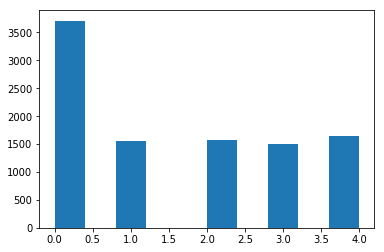

In [17]:
plt.hist(myWinners)
plt.show()

In [19]:
#todo: fix the game there are still some issue, if I have the same color I should get a better chance of winning

Your are player 0!


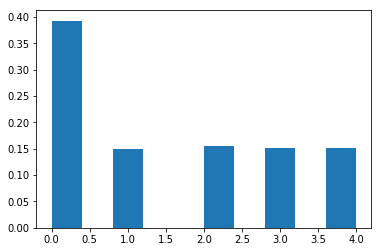

In [21]:
myWinners = []

myNbOfSim = 10000
myForcedCards = True
myNbOfPlayer = 5

if myForcedCards:
    print("Your are player 0!")
   
myCard1 = card('♥','K')
myCard2 = card('♥','A')

for i in range(0,myNbOfSim):
    
    myGame = game_simple(nbOfPlayer_=myNbOfPlayer, forcedCards_ = myForcedCards)
    myGame.dealCards(myCard1, myCard2)
    myGame.dealFlop()
    myGame.dealTurn()
    myGame.dealRiver()
    myWinners.append(myGame.getWinner())
weights = np.ones_like(myWinners)/float(len(myWinners))
plt.hist(myWinners,weights=weights)
plt.show()    
    

In [25]:

class Strategies():
    
#     __slots__ = ""
    
    def bid(self, aBid):
        return None
        
    def check(self):
        return None

Strategy 1 Benchmark: Iterative way :

stupid strategy, making many assumptions 

5 players
We got 40% chance of having the best hand, 12.5% for all the others:
We bidded 20 dol until now
We have 100 dol is on the table and a further 20 might fall
We have to check a further 10$ to continue playing

Should we add this 10$ ?

We are at the last stage
Basically : We could win between 110 and 130 (what is the prob density over this interval ?)

Y: pot
X: our gain
$ E(X) = .4*Y + .6*0 -10  > .4*110 - 10 = 34 $ $

34 < E(X) < 42 (if only this bid)
So we should play

Stage before :
Same prob let's say
32 dol on table
12 bid

$ E(X) = .4*Y + .6*0 -10  > .4*20 - 20 = -12 $ $

E1 = "Everyone bids now, no further game bid"

E(X|E1) > .4*80-12  = 20 

E2 = "Some bet Now, no further bid"

T = their expectation

C = [[0,1]]

what if they bet according to their chance of winning ?

E(X|"bet according to prob"&E2) = .4*(44 + 3*C)-12  > 0 anyway

E(T1|"bet according to prob"&E2&If I play) = .125*(56 + 2*C) - 12

E(T2|"bet according to prob"&E2&If All before Play) = .125*(68 + 1*C) - 12

E(T3|"bet according to prob"&E2&If All before play) = .125*(80) - 12 = 8+2 -12 = -2 : No play

rolling back, 2 and 1 should not play
I end up with : E(X) = 17.6-12= 5.6 I should play



Your are player 0!


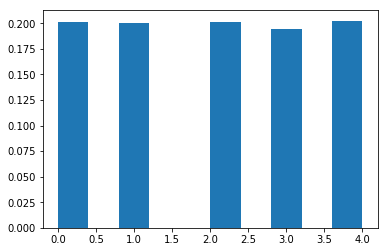

In [19]:
myNbOfSim = 10000
myWinners = []
myForcedCards = True
myNbOfPlayer = 5
if myForcedCards:
    print("Your are player 0!")


for i in range(0,myNbOfSim):
    
    myGame = game(nbOfPlayer_=myNbOfPlayer)
    
    myGame.dealCards(myCard1, myCard2)
    myGame.doRound()
    myGame.dealFlop()
    myGame.dealTurn()
    myGame.dealRiver()
    myWinners.append(myGame.getWinner())
weights = np.ones_like(myWinners)/float(len(myWinners))
plt.hist(myWinners,weights=weights)
plt.show()

In [112]:

myNbOfPlayer = 5


    
myGame = game(nbOfPlayer_=myNbOfPlayer)

myGame.dealCards(myCard1, myCard2)
myGame.doRound()
myGame.dealFlop()
myGame.doRound()
myGame.dealTurn()
myGame.doRound()
myGame.dealRiver()
myGame.doRound()
myWinners.append(myGame.getWinner())

You are player 0

 You have 1000 dollars

 There is 15 dollars in the pot
Current bet is 10, you need to add 10

 Your cards are :
['3♠', '4♦']

 The River is :
[]

 F:Fold 
 B+X:Bet X dollars 
 C:Check 
 
B+50
You are player 1

 You have 1000 dollars

 There is 65 dollars in the pot
Current bet is 50, you need to add 50

 Your cards are :
['7♥', '8♣']

 The River is :
[]

 F:Fold 
 B+X:Bet X dollars 
 C:Check 
 
B+800
You are player 2

 You have 1000 dollars

 There is 265 dollars in the pot
Current bet is 200, you need to add 200

 Your cards are :
['Q♦', '2♦']

 The River is :
[]

 F:Fold 
 B+X:Bet X dollars 
 C:Check 
 
gf


IndexError: list index out of range